# ML/AI training Notebook

My second training dataset for the Emeritus / Columbia "Postgraduate Diploma in Machine Learning and Artificial Intelligence". 

The following dataset is from Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn/data

# Dataset description:
    
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features). 

Target variable:
* Churn: "Yes", "No"

Features:
* Customer ID: an ID
* gender: 'Male' or 'Female'
* SeniorCitizen: 0 or 1
* Partner: Does the customer have a partner 0 or 1
* Dependents: "Yes", "No"
* tenure: How long the customer is with the company
* PhoneService: "Yes", "No"
* MultipleLines: "Yes", "No", "No phone service"
* InternetService: "DSL", "Fiber optic", "No"
* OnlineSecurity: "Yes", "No", "No internet service"
* OnlineBackup: "Yes", "No", "No internet service"
* DeviceProtection: "Yes", "No", "No internet service"
* TechSupport: "Yes", "No", "No internet service"
* StreamingTV: "Yes", "No", "No internet service"
* StreamingMovies: "Yes", "No", "No internet service"
* Contract: "Month-to-month", "Two year", "One year"
* PaperlessBilling: "Yes", "No"
* PaymentMethod: "Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"
* MonthlyCharges: USD per month
* TotalCharges: in USD

# Loading the dataset

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# load dataset from .csv, 

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# split into X and y

y = df['Churn']
X = df.drop([['Churn','customerID']],axis=1) 

In [4]:
# Let's have a look into the target variable
y.value_counts()

# Mental note 1: Unbalanced dataset
# Mental note 2: "Naive score": 73.46% (If we predict all to be non-churn)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
# Let's get first ideas about the data
X.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Observations:
- only 3 quantitative variables
    - of this Senior Citizen is a dummy
    - tenure I expect will be important, how long is the customer with the company. Distribution of this in comparison with target will be insightful
    - Monthly Charges - will also be very important I guess

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Very nice dataset. No NANs.
But formats: 
* TotalCharges is a number. Are there values that are not a number?

In [7]:
# pd.to_numeric(X.TotalCharges) threw an error that value " " cannot be converted
X[X.TotalCharges == " "]
# That is the case for only 11 rows
# And it looks like this is because tenure is "0"

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,


In [8]:
X[X.tenure == 0]
# Yes that is true, therefore it is content-wise right to enter a 0 into the respective TotalCharges column

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,


In [9]:
X[X.TotalCharges==" "]=0

In [10]:
X[X.TotalCharges==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [15]:
X.TotalCharges=pd.to_numeric(X.TotalCharges)

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


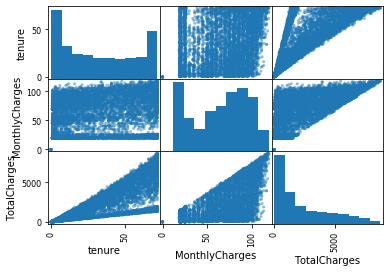

In [20]:
pd.plotting.scatter_matrix(X[["tenure","MonthlyCharges","TotalCharges"]]);

Interesting. Of course tenure and Total Charges are completely correlated.
"Monthly Charges" * "tenure" = "TotalCharges" will be about right. (Yes, there will be most likely in-life changes to monthly charges)
So it may be a good idea to ignore TotalCharges.
Other interesting fact is that highest charges are where tenure is longest. Most likely due to overall decreasing telco prices over time and these long-tenure contracts are not repriced. "Sleepers"a

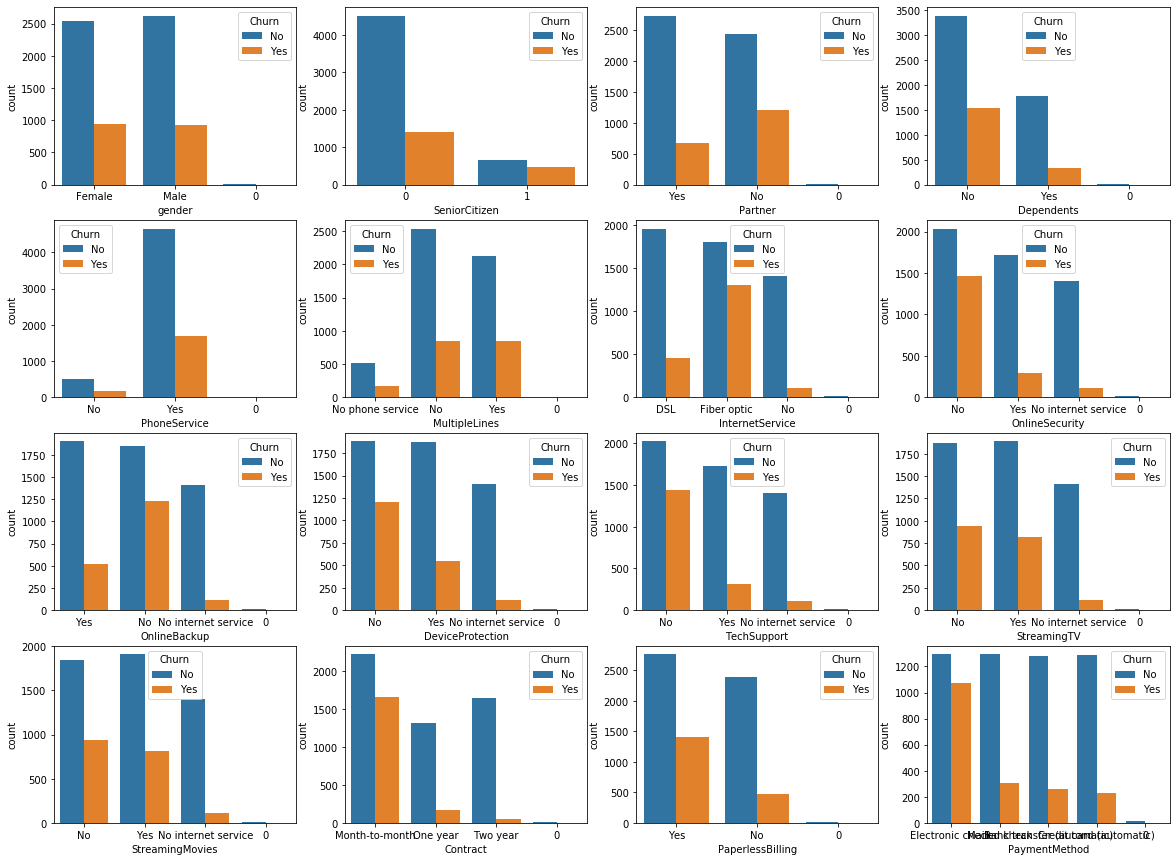

In [42]:
categorical=["gender","SeniorCitizen", "Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]

plt.figure(figsize=(20,15))

for index, item in enumerate(categorical):
    plt.subplot(4,4,index+1)
    sns.countplot(X[item], hue=y)

Observations:
* What are all these funny "0" categories? very little occurence but still. It's NaNs I think. 
* Female / Male vs churn/no churn seems to have been a splitting criteria for the data set. Seem to be exactly the same numbers
* % of churn per category is intersting KPI
* Customers of Internet Service via fiber optic have very high churn. Why is that? Vs. DSL? Are these contracts to expensive and therefore customers "downgrade" or change providers? -> Goes on the to do list
* Category "No Internet service" in many features is funny. It has very low churn rates because "Voice only" customers do not churn. So the models would probably predict that it is best to not sell customers Internet service and on-top-services!?
* Contract duration. 1 and 2 year contracts are far less likely to churn. Duh. But the month-to-month ones are much more likely to re-subscribe. I never really understood logic of "churn"... One year contract churn is probably around 1/12 and two year contract churn probably around 1/24. And then prolong? Or "washing machine" style churn from one operator to the next and then back.

In [47]:
X[X["Contract"]==0]
#for item in X.columns:
#    X[item]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
936,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
1082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
1340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
3331,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
3826,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
4380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
6670,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0


Oh. Obviously same rows are completely "0". I didn't expect that.

In [48]:
X.drop(df.index[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]],inplace=True)

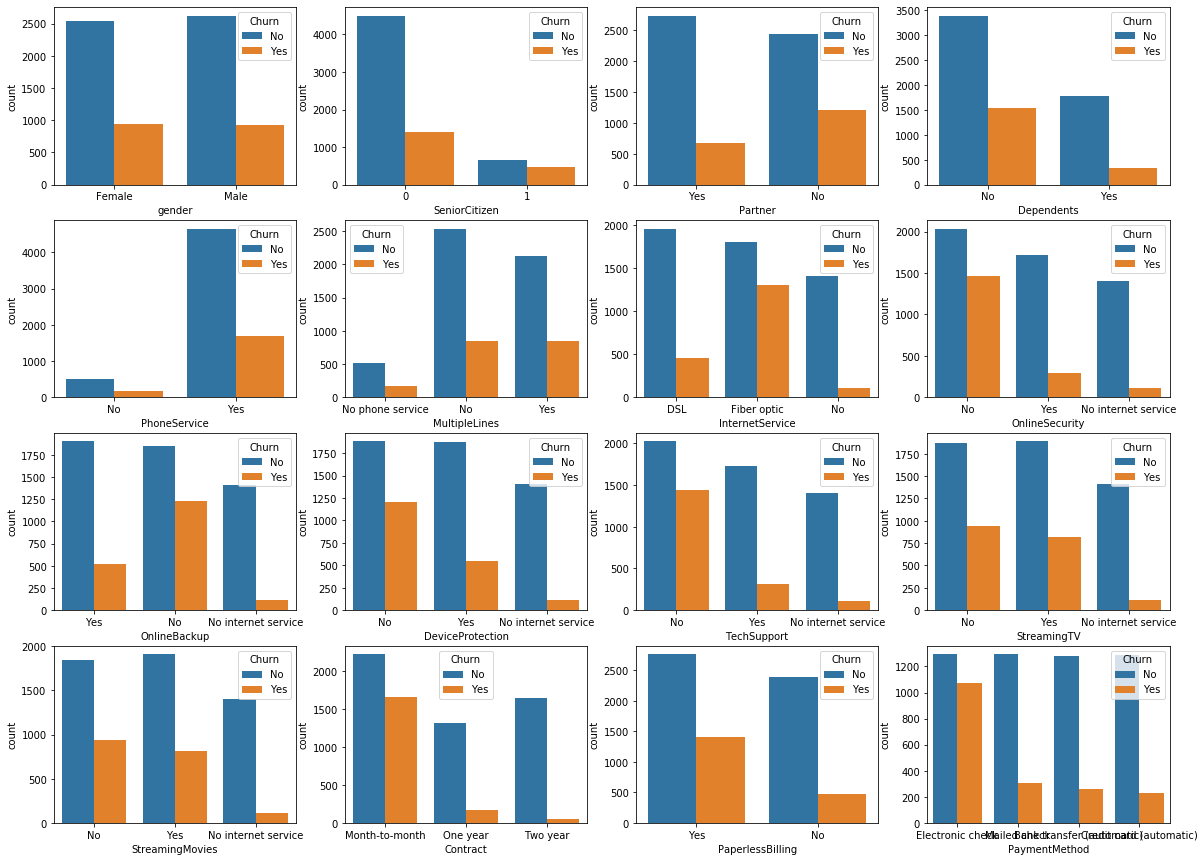

In [50]:
plt.figure(figsize=(20,15))

for index, item in enumerate(categorical):
    plt.subplot(4,4,index+1)
    sns.countplot(X[item], hue=y)

MY WORK IS UNTIL HERE - EVERYTHING BELOW IS REPOSITORY

Questions / Open Issues:
* Delete "0"s in the data
* A binary target variable - does this make sense? Regression model predicts likelihood in % of churn?
* Time of churn? Is this "this month" where the database was pulled?
* what is monthly and total charges?
* customer ID - can it be valuable?
* unbalanced dataset. 1869 churn vs 5174 non-churn. Prediction of churn is what we are going for. This is the valuable information. Try the three approaches: underweight non-churn. duplicate churn. Or this funny method
* Ignore total charges as this depends on tenure 
* Customers of Internet Service via fiber optic have very high churn. Why is that? Vs. DSL? Are these contracts to expensive and therefore customers "downgrade" or change providers? 
* Think how to handle the distincion "no internet service"

# Basic look into the data:

In [ ]:
# Naive model with all parameters
lr=LinearRegression()
lr.fit(X,y)
preds = lr.predict(X)
score = round(lr.score(X,y),2)
print(score)

In [ ]:
# Naive model with categorical data as dummies
X =  pd.get_dummies(X, columns = ['waterfront', 'view','condition','grade'],drop_first=True)

In [ ]:
# Naive model with all non-categorial parameters
lr.fit(X,y)
preds = lr.predict(X)
score = round(lr.score(X,y),5)
print(score)

This added little value. I think because the categorical variables are already meaningful by their magnitudes. The higher the value of the category, the "better".

In [ ]:
# One more idea: Generate new features
# Square feet / room
X["sqft/room"]=df.sqft_living/(X.bedrooms+X.bathrooms)
X["sqft/room"].replace(np.inf,X["sqft/room"].median(),inplace=True)
print(X["sqft/room"].median())
X["sqft/room"].describe()

In [ ]:
lr.fit(X,y)
preds = lr.predict(X)
score = round(lr.score(X,y),5)
print(score)

This added very little value.

# Run linear regression for each parameter individually

Just for curiosity, I would like to see how the model would behave if applied to each feature individually. These charts are also good to check if there's a linear relationship between each input vs price.



In [ ]:
lr = LinearRegression()

#Iterate over features, fit the model, and plot chart for each one of them including "score".
plt.figure(figsize = (15, 50))
scores = pd.Series(index=X.columns, dtype='float64')
for index, feature in enumerate(X.columns):
    X_input = X[[feature]]
    lr.fit(X_input, y)
    preds = lr.predict(X_input)
    score = round(lr.score(X_input,y),2)
    plt.subplot(9, 4, index+1)
    plt.scatter(X_input, y, label = feature)
    plt.plot(X_input, preds, color = 'red', label = 'Predictions')
    plt.legend()
    plt.title(feature +' vs. Price, score= ' + str(score))
    scores[feature] = score

Observations:
- Dummy variable stand-alone value depends highly (I think) on how often the respective grade appears. eg Grade_3 I would guess appears rarely, therefore stand-alone has little impact on overall price
- sqft/room as stand-alone variable is strong, but it's additional value in the blended model disappeared

In [ ]:
#sns.heatmap(X.corr()) Helmut: replace this line for the two lines below to get better view
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), linewidth=0.5,cmap="RdBu"); 

Observations:
- Checking the colouring of the grade dummies its interesting to observe that there seem to be two clusters in the data. A high-quality cluster  which has higher amounts of rooms and sqm and lot and a "low-quality" cluster with less rooms, less sqft etc.
- So: Small houses with less rooms tend to be of worse grade and vice versa
- All the "original" variables correlate rather negatively to each other: same as above: The more rooms, the more lot, the newer the houses even often...

Let's improve the data:
1) yr-renovated
2) sqft_basement
3) check outliers

In [ ]:
# Step 1: Year renovated
X.yr_renovated.value_counts()

In [ ]:
# Idea 1: Make a dummy variable out of it

# Saving original column for other trials first
renovated=X.yr_renovated

# now make dummy

filter=(X["yr_renovated"]!=0)
X.loc[filter,"yr_renovated"]=1

In [ ]:
X.yr_renovated.value_counts()

Lets see if it improved the model

In [ ]:
lr.fit(X,y)
preds = lr.predict(X)
score = round(lr.score(X,y),5)
print(score)

actually it got slightly worse ;-)

In [ ]:
# Idea 2: Let's see if it improves if I put renovated = build in case of zero

# At first restore original column:
X.yr_renovated=renovated

filter=(X.yr_renovated==0)

X.loc[filter,"yr_renovated"]=X.loc[filter,"yr_built"]

In [ ]:
lr.fit(X,y)
preds = lr.predict(X)
score = round(lr.score(X,y),5)
print(score)

Even worse :-)
So lets delete it

In [ ]:
#Only ~5% of data has yr_renovated
X.drop("yr_renovated",axis=1, inplace=True)

lr.fit(X,y)
preds = lr.predict(X)
score = round(lr.score(X,y),5)
print(score)

2) Sqft basement

In [ ]:
X.sqft_basement.value_counts()

More than half of the data does not have this data.
What would be a good replacement for "zero"?
Oh not. It is correct. It just means there is no basement

Step 3: Check for outliers

In [ ]:
plt.figure(figsize = (15, 2))
features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']
i=0
for item in features:
    i+=1
    plt.subplot(1, 7, i)
    sns.boxplot(X[item])  
    plt.title(item)

- One property with 30+ bedrooms
- sqft_lot very right skewed

Might be a good idea to cap the extreme values as anyway such properties follow an inherently different pricing logic than "mass market" properties. But not for now.

# Week 2: Ridge Regression

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

# 70% train, 30% test - random state for replication if so wished
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=101)

In [ ]:
# Before ridge, lets replicate linear regression from before and test on test-set as baseline
lr.fit(X_train,y_train)

score_train_set = round(lr.score(X_train,y_train),5) 
score_test_set = round(lr.score(X_test,y_test),5)
print("Train set accuracy:",score_train_set)
print("Test set accuracy:", score_test_set)

That is actually really nice. Performance on test is (slightly) better than on train!

In [ ]:
# Now lets do a ridge regression (by design without normalization yet to see the effect)
from sklearn.linear_model import Ridge 

model = Ridge(alpha = 1.0) #1.0 is the standard setting of sklearn, therefore I left it but wanted to state it directly
model.fit(X_train, y_train) 

score_train_set = round(model.score(X_train,y_train),5) 
score_test_set = round(model.score(X_test,y_test),5)
print("Train set accuracy:",score_train_set)
print("Test set accuracy:", score_test_set)

Didn't improve the performance, maybe due to alpha, maybe due to scaling

In [ ]:
# Now lets normalize the data to see how it improves
from sklearn.preprocessing import StandardScaler 

# scaling the inputs 

scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)
scaled_y_train = pd.DataFrame(scaler.fit_transform(y_train),columns = y_train.columns)
scaled_y_test = pd.DataFrame(scaler.fit_transform(y_test),columns = y_test.columns)

In [ ]:
# Sneak Peak
scaled_X_train.head()

Dummy variables are now interesting I notice. But according to the following discussion it is not bad for the model / the following estimates per se: https://www.quora.com/How-bad-is-it-to-standardize-dummy-variables

Only drawbacks: More computational power needed and the interpretation is not as clear as "0" or "1", could lead to "sloppy thinking" as one discutant phrases it.

In [ ]:
# Now once again, this time with normalized features
model = Ridge(alpha = 1.0) #1.0 is the standard setting of sklearn, therefore I left it but wanted to state it directly
model.fit(scaled_X_train, scaled_y_train) 

score_train_set = round(model.score(scaled_X_train,scaled_y_train),5) 
score_test_set = round(model.score(scaled_X_test,scaled_y_test),5)
print("Train set accuracy:",score_train_set)
print("Test set accuracy:", score_test_set)

Slighty better on train, slightly worse on test. So in this case not a big issue. I still think that the dataset per se is not very meaningful / interesting. Not enough diverse, i.e. uncorrelated features.

But before I look for a more interesting dataset let's build a parameter grid-search for alpha with k-fold validation.

I like the schema shown in the sklearn documentation: https://scikit-learn.org/stable/modules/cross_validation.html

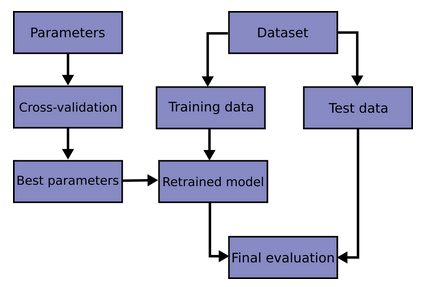

In [ ]:
# There is a special class for this: RidgeCV has CV build-in
from sklearn.linear_model import RidgeCV

values=np.linspace(0,100,num=100) # alphas values to try, I tried a bit around

model=RidgeCV(alphas=values, cv=10) # using k-fold validation
model.fit(scaled_X_train, scaled_y_train)
model.score(scaled_X_test, scaled_y_test)

In [ ]:
model.alpha_

Only very slightly better than the standard alpha value of 1 from my first ridge model.

Ok: For next iteration let's look for a more interesting dataset.

Lets look at the weights from aboves ridge regression model

In [ ]:
table={}
i=0
for item in X_train.columns:
    table[item]=round(model.coef_[0][i],2)
    i+=1

In [ ]:
print(sorted(table.items(), key=lambda x: x[1], reverse=True))

# I am sure there is way nicer code to show this. Any hint/pointer is appreciated.

Some coefficients look funny: 
- Lat is positive whereas long is negative, but it may be that neighbourhoods into a direction are "better" or "worse"
- Bedrooms is negative, so is yr_built

Lets see a Lasso-regularization on this, by now well known, dataset

In [ ]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=0)
lasso.fit(scaled_X_train, scaled_y_train)
lasso.score(scaled_X_test, scaled_y_test)

Didn't change anything.

In [ ]:
table={}
i=0
for item in X.columns:
    table[item]=round(lasso.coef_[i],2)
    i+=1
print(sorted(table.items(), key=lambda x: x[1], reverse=True))

Looks a bit more meaningful!

Sqft_living strongest indicator by far, then "lat" and whether or not high "grades" of house.